# 从复平面到相位

考虑信号：

$$
f(t) = A\cdot \cos(\omega t + \theta_0)
$$

其中，
- $A$ 是幅值
- $\omega$ 是角频率
- $\theta_0$ 是初相位

我们看到，相位是一个角度。角度总是与圆相关。然而，我们从信号中确看不到这个圆。然而，直觉告诉我们，这个圆是存在的。似乎，这个圆被“压”到了信号中。那么，我们如何看到这个圆呢？

既然圆从二维被压到了一维，那么，我们是否可以让圆恢复二维呢？这就需要利用一个与之正交的信号把维度“撑”回来。

下面请出数学中最优美的公式————欧拉公式。

$$
e^{j\theta} = \cos\theta + j\sin\theta
$$

这个公式所处的空间是一个复平面。其中，$j$ 是虚数单位，满足 $j^2 = -1$。

另外，在正式开始之前，还想介绍一下，真正的最优美的公式，其实是当欧拉公式中的 $\theta$ 取 $\pi$ 的时候，即：

$$
e^{j\pi} = -1
$$

这个公式连接了数学中最重要的五个常数：0, 1, $\pi$, $e$, $j$。


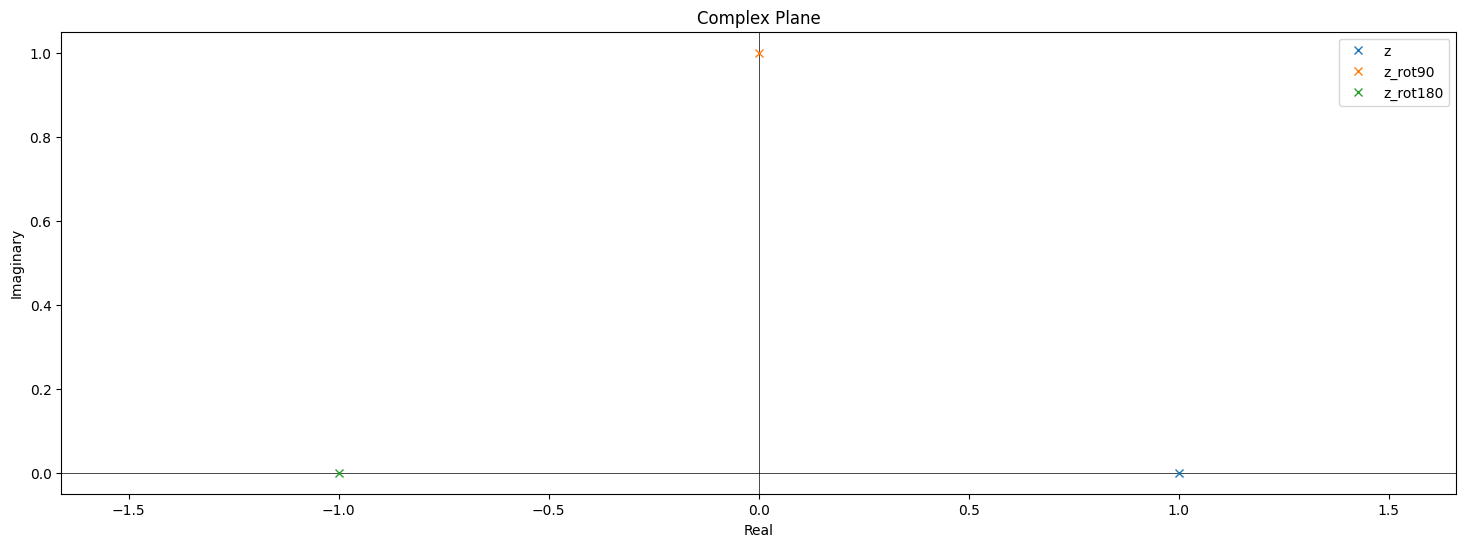

In [5]:
import matplotlib.pyplot as plt

z = 1 + 0j
z_rot90 = z * 1j
z_rot180 = z * 1j * 1j

# 绘制复平面
plt.figure(figsize=(18, 6))
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.plot(z.real, z.imag, 'x', label='z')
plt.plot(z_rot90.real, z_rot90.imag, 'x', label='z_rot90')
plt.plot(z_rot180.real, z_rot180.imag, 'x', label='z_rot180')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axis('equal')
plt.title('Complex Plane')
plt.legend()
plt.show()



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%matplotlib inline
theta = np.linspace(0, 2*np.pi, 100)
z_theta = np.exp(theta*1j)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid(True)
ax.axhline(y=0, color='k', linestyle='--')
ax.axvline(x=0, color='k', linestyle='--')
ax.set_title('unit circle')

line, = ax.plot([], [], 'r-')
point, = ax.plot([], [], 'bo', markersize=10)

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(z_theta[:i+1].real, z_theta[:i+1].imag)
    point.set_data(z_theta[i].real, z_theta[i].imag)
    return line, point

anim = FuncAnimation(fig, animate, init_func=init, frames=len(theta), interval=50, blit=True)

plt.close(fig)  # 防止在Jupyter中显示静态图像
HTML(anim.to_jshtml())


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10300\3808696441.py:29: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(z_theta[i].real, z_theta[i].imag)


## 信号的相位

$$
f(t) = A\cdot \cos(\omega t + \theta_0)
$$

中，$\theta_0$ 是初相位。整个的相位是 $\omega t + \theta_0$。可以写成：

$$
\theta(t) = \omega t + \theta_0
$$

则：

$$
f(t) = A\cdot \cos(\theta(t))
$$

通过“借”一个正弦信号，我们可以把信号放到复平面上，从而将$\theta$ 转换为复平面上圆的角度。

$$
\begin{align*}  
g(t) &= A\cdot (\cos(\theta(t)) + j\sin(\theta(t))) \\
&= A\cdot e^{j\theta(t)}
\end{align*}
$$

对于三相电，我们可以用同样的方法来表示：

$$
\begin{align*}  
u_a(t) &= A\cdot \cos(\omega t + 0) \\
u_b(t) &= A\cdot \cos(\omega t + \frac{2\pi}{3}) \\
u_c(t) &= A\cdot \cos(\omega t + \frac{4\pi}{3}) \\
\end{align*}
$$

可以看到，三相电的相位差是固定的，都是 $\frac{2\pi}{3}$。

同样地，我们可以把三相电放到复平面上，用欧拉公式表示：

$$
\begin{align*}  
u_a(t) &= A\cdot e^{j\omega t} \\
u_b(t) &= A\cdot e^{j(\omega t + \frac{2\pi}{3})} \\
u_c(t) &= A\cdot e^{j(\omega t + \frac{4\pi}{3})} \\
\end{align*}
$$




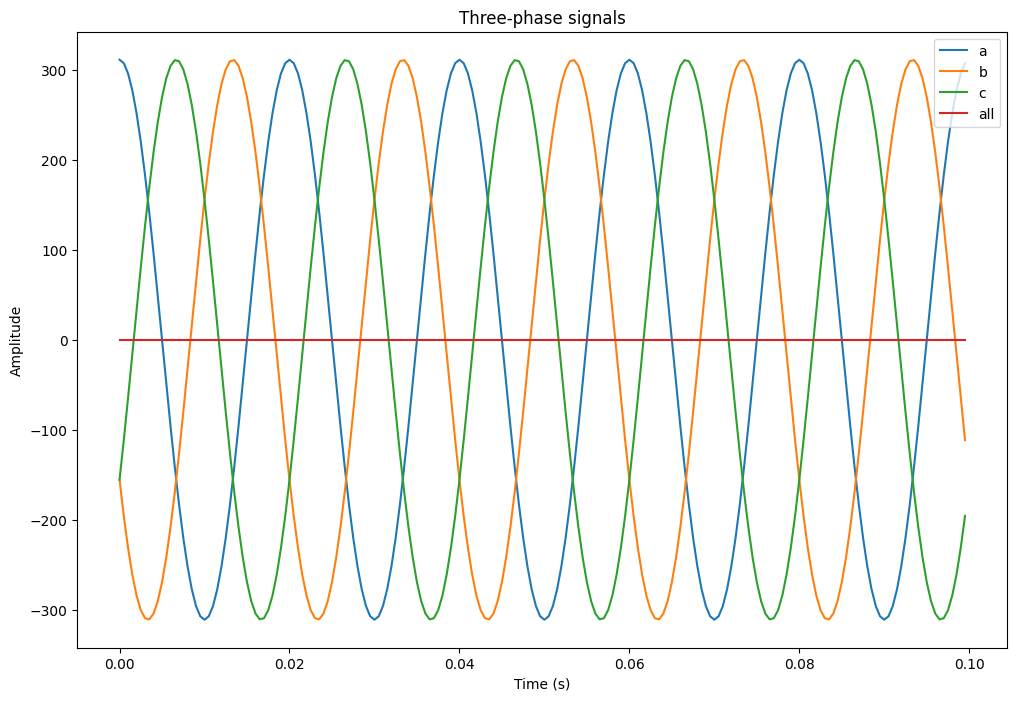

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 工频信号
f = 50
sampling_rate = 2000
T = 0.1
t = np.arange(0, T, 1/sampling_rate)
A = 220*np.sqrt(2)
w = 2 * np.pi * f
u_a = A*np.cos(w * t)
u_b = A*np.cos(w * t + 2*np.pi/3)
u_c = A*np.cos(w * t + 4*np.pi/3)
u_all = u_a + u_b + u_c

# 绘制信号
plt.figure(figsize=(12, 8))
plt.plot(t, u_a, label='a')
plt.plot(t, u_b, label='b')
plt.plot(t, u_c, label='c')
plt.plot(t, u_all, label='all')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Three-phase signals')
plt.legend()
plt.show()


## 三相电为什么是380V？

### 方法一：直接计算

设：

$$
\begin{align*}  
f(t) &= A\cdot \cos(\omega t + 0) \\
g(t) &= A\cdot \cos(\omega t + \frac{2\pi}{3})
\end{align*}
$$

则

$$
\begin{align*} 
g(t) - f(t) &= A\cdot \cos(\omega t + \frac{2\pi}{3}) - A\cdot \cos(\omega t) \\
&= A\cdot \left[\cos(\omega t + \frac{2\pi}{3}) - \cos(\omega t)\right] \\
&= -2A \cdot \sin(\frac{(\omega t + \frac{2\pi}{3} + \omega t)}{2}) \cdot \sin(\frac{(\omega t + \frac{2\pi}{3} - \omega t)}{2}) \\
&= -2A \cdot \sin(\omega t + \frac{\pi}{3}) \cdot \sin(\frac{\pi}{3}) \\
&= -\sqrt{3}A \cdot \sin(\omega t + \frac{\pi}{3})
\end{align*}
$$

### 方法二：利用复平面作图

略